### Social Network Ad - All ML Analysis


* A categorical dataset to determine whether a user purchased a particular product
* The dataset contains details of the purchase of a product based on social network advertisements based on gender, age, and estimated salary.
* Here we can split the data into two parts **features and Target**. Target being Purchased and rest be features.
* In this notebook, the prediction is made whether a person will buy a product displayed on a social network advertisement using almost all **ML** approach. 
* A decision is made out of the approaches and also an approach which is the best is chosen out of it.
* The **ML** approaches applied are 
    - Logistics Rgression 
    - Random Forest 
    - Decision Tree
    - KNN
    - SVM

#### Structure:
##### Import Libraries one by one according to the requirement of the data 
* Import libraries for reading and cleaning the data to make it ready for prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data reading and cleaning 

In [2]:
d=pd.read_csv('Social_Network_Ads.csv')

In [3]:
d

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df=d.copy()

In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [10]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [11]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#### Data is completely cleaned and ready for prediction. Depending upon the ML approach we will modify the data accordingly 

##### To build a model 
* Multiple variables which are independent features to predict a dependent variable 
* Classify the data by replace method and drop columns which are not required 

In [12]:
df.Gender=df.Gender.replace({"Male":0,"Female":1})

In [13]:
df.drop(['User ID'],axis=1,inplace=True)

In [14]:
x=df.drop(['Purchased'],axis=1)

In [15]:
y=df['Purchased']

In [16]:
x

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

#### Splitting the dataset:
* test_size = 0.25 so that data is split into 75% and 25%
* random_state is applied so that each time we run we get the same result 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=27)

In [20]:
x_train.shape

(300, 3)

In [21]:
x_test.shape

(100, 3)

In [22]:
y_train.shape

(300,)

In [23]:
y_test.shape

(100,)

#### importing **Confusion matrix  and accuracy score** which is applied for each model in the same way 

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

### Logistic Regression :
* Logistic regression models a relationship between predictor variables and a categorical response variable. Here, we could use logistic regression to model the relationship between various features of purchasing (such as Age and Salary) to predict if a person purchase or not (a binary variable: either yes or no). Logistic regression helps us estimate a probability of falling into a certain level of the categorical response given a set of predictors.

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model_LR=LogisticRegression()

In [27]:
model_LR.fit(x_train,y_train)

LogisticRegression()

In [28]:
model_LR.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
y_predict=model_LR.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [30]:
perform_LR=confusion_matrix(y_test,y_predict)
perform_LR

array([[65,  0],
       [35,  0]], dtype=int64)

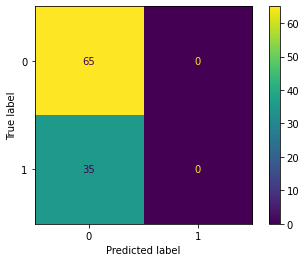

In [31]:
plot_confusion_matrix(model_LR,x_test,y_test)
plt.show()

In [32]:
accuracy_score(y_test,y_predict)

0.65

#### Logistic regression :
* accuracy 65%
* 65 correct prediction
* 35 false prediction

#### KNN:
* The K-Nearest Neighbors or KNN Classification is a simple and easy to implement, supervised machine learning algorithm that is used mostly for classification problems but applicable for regression problems too.

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
model_KNN=KNeighborsClassifier(n_neighbors=5)

In [35]:
model_KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [36]:
model_KNN.score(x_train,y_train)

0.8666666666666667

In [37]:
model_KNN.score(x_test,y_test)

0.77

In [38]:
y_predict_KNN=model_KNN.predict(x_test)

In [39]:
y_predict_KNN

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [40]:
accuracy_score(y_test,y_predict_KNN)

0.77

In [41]:
perform_KNN=confusion_matrix(y_test,y_predict_KNN)

In [42]:
perform_KNN

array([[59,  6],
       [17, 18]], dtype=int64)

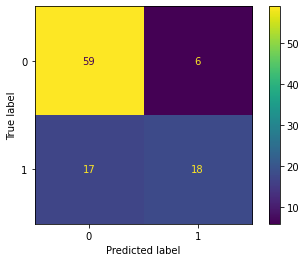

In [43]:
plot_confusion_matrix(model_KNN,x_test,y_test)
plt.show()

### KNN:
* accuracy 77%
*  77 correct prediction
*  23 false prediction


#### Decision Tree:
* Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model_DC=DecisionTreeClassifier()

In [46]:
model_DC.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
y_predict_DC=model_DC.predict(x_test)
y_predict_DC

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [48]:
accuracy_score(y_test,y_predict_DC)*100

87.0

In [49]:
performance_DC=confusion_matrix(y_test,y_predict_DC)

In [50]:
performance_DC

array([[60,  5],
       [ 8, 27]], dtype=int64)

plot_confusion_matrix(model_DC,x_test,y_test)
plt.show()

### Decision tree:
* accuracy 87%
*  75 correct prediction
*  13 false prediction

### Random Forest:
* Random forests is a supervised learning algorithm. It can be used both for classification and regression. 
* It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance. 

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
modelrf= RandomForestClassifier()
modelrf.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
y_predictrf=modelrf.predict(x_test)
y_predictrf

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [54]:
accuracy_score(y_test,y_predictrf)*100

87.0

In [55]:
performancerf=confusion_matrix(y_test,y_predictrf)
performancerf

array([[58,  7],
       [ 6, 29]], dtype=int64)

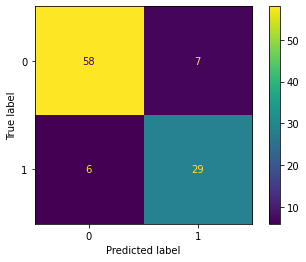

In [56]:
plot_confusion_matrix(modelrf,x_test,y_test)
plt.show()

### Random Forest:
* accuracy 87%
*  87 correct prediction
*  13 false prediction

### SVC :
* The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is. This makes this specific algorithm rather suitable for our uses, though you can use this for many situations.

In [57]:
from sklearn.svm import SVC

In [58]:
model_SVM=SVC()

In [59]:
model_SVM.fit(x_train,y_train)

SVC()

In [60]:
model_SVM.score(x_train,y_train)

0.7766666666666666

In [61]:
model_SVM.score(x_test,y_test)

0.73

In [62]:
y_predict_SVM=model_SVM.predict(x_test)

In [63]:
y_predict_SVM

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [64]:
accuracy_score(y_test,y_predict_SVM)

0.73

In [65]:
perform_SVM=confusion_matrix(y_test,y_predict_SVM)

In [66]:
perform_SVM

array([[62,  3],
       [24, 11]], dtype=int64)

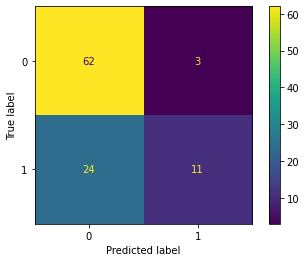

In [67]:
plot_confusion_matrix(model_SVM,x_test,y_test)
plt.show()

### SVC:
* accuracy 73%
*  73 correct prediction
*  27 false prediction

### Naive Bayes Classifier:
* Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
modelNB=GaussianNB()

In [70]:
modelNB.fit(x_train,y_train)

GaussianNB()

In [71]:
modelNB.score(x_test,y_test)

0.87

In [72]:
modelNB.score(x_train,y_train)

0.89

In [73]:
y_predict_NB=modelNB.predict(x_test)

In [74]:
y_predict_NB

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [75]:
accuracy_score(y_test,y_predict_NB)*100

87.0

In [76]:
performanceNB=confusion_matrix(y_test,y_predict_NB)

In [77]:
performanceNB

array([[61,  4],
       [ 9, 26]], dtype=int64)

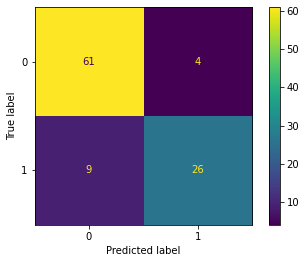

In [78]:
plot_confusion_matrix(modelNB,x_test,y_test)
plt.show()

#### Observation
* Logistic Regression- 65%
* Random Forest -87%
* Decision Tree - 87%
* KNN - 77%
* SVM- 73%
* Naive Bayes- 87%

#### So we could find that Random Forest, Decision Forest and Naive bayes shows 87% accuracy 